<a href="https://colab.research.google.com/github/gspandhana/MachineLearning/blob/main/P9_ModelSelection_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/data

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("dataset.csv")

In [ ]:
# Assign the values of column x as the predictor
x = df[['x']].values

# Assign the values of column y as the response variable
y = df.y.values

In [ ]:
### edTest(test_random) ###
# Split the data into train and validation sets with 75% for training
# and with a random_state=1
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state = 1)

### Computing the MSE

In [ ]:
# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create three empty lists to store training, validation and cross-validation MSEs
training_error, validation_error, cross_validation_error = [],[],[]

# Loop through the degrees of the polynomial
for d in range(1, maxdeg+1):

    # Compute the polynomial features for the entire data
    x_poly = PolynomialFeatures(degree = d).fit_transform(x)

    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)

    # Initialize a Linear Regression object (set fit_intercept to False since PolynomialFeatures adds an intercept by default)
    lreg = LinearRegression()

    # Fit model on the training set
    lreg.fit(x_poly_train, y_train)

    # Predict on the training data
    y_train_pred = lreg.predict(x_poly_train)

    # Predict on the validation set
    y_val_pred = lreg.predict(x_poly_val)

    # Compute the mse on the train data
    training_error.append(mean_squared_error(y_train_pred, y_train))

    # Compute the mse on the validation data
    validation_error.append(mean_squared_error(y_val_pred, y_val))

    # Perform cross-validation on the entire data with 10 folds and
    # get the mse_scores
    mse_score = cross_validate(lreg, x_poly, y, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
    print(sorted(mse_score.keys()))

    # Compute the mean of the cross validation error and store in list
    # Remember to take into account the sign of the MSE metric returned by the cross_validate function
    cross_validation_error.append(-mse_score['test_neg_mean_squared_error'].mean())
    print(cross_validation_error)

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'train_neg_mean_squared_error', 'train_r2']
[29.46038990113331]
['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'train_neg_mean_squared_error', 'train_r2']
[29.46038990113331, 17.21896089024441]
['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'train_neg_mean_squared_error', 'train_r2']
[29.46038990113331, 17.21896089024441, 58.40062795603054]
['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'train_neg_mean_squared_error', 'train_r2']
[29.46038990113331, 17.21896089024441, 58.40062795603054, 172.6405845335134]
['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'train_neg_mean_squared_error', 'train_r2']
[29.46038990113331, 17.21896089024441, 58.40062795603054, 172.6405845335134, 3212.4966382087528]
['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2', 'train_neg_mean_squared_error', 'train_r2']
[29.46038990113331, 17.21896089

In [ ]:
# Get the best degree associated with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)


# Get the best degree associated with the lowest cross-validation error
min_cross_val_mse = min(cross_validation_error)
best_cross_val_degree = cross_validation_error.index(min_cross_val_mse)

# Print the values
print("The best degree of the model using validation is",best_degree)
print("The best degree of the model using cross-validation is",best_cross_val_degree)

The best degree of the model using validation is 1
The best degree of the model using cross-validation is 1


### Plotting the error graph

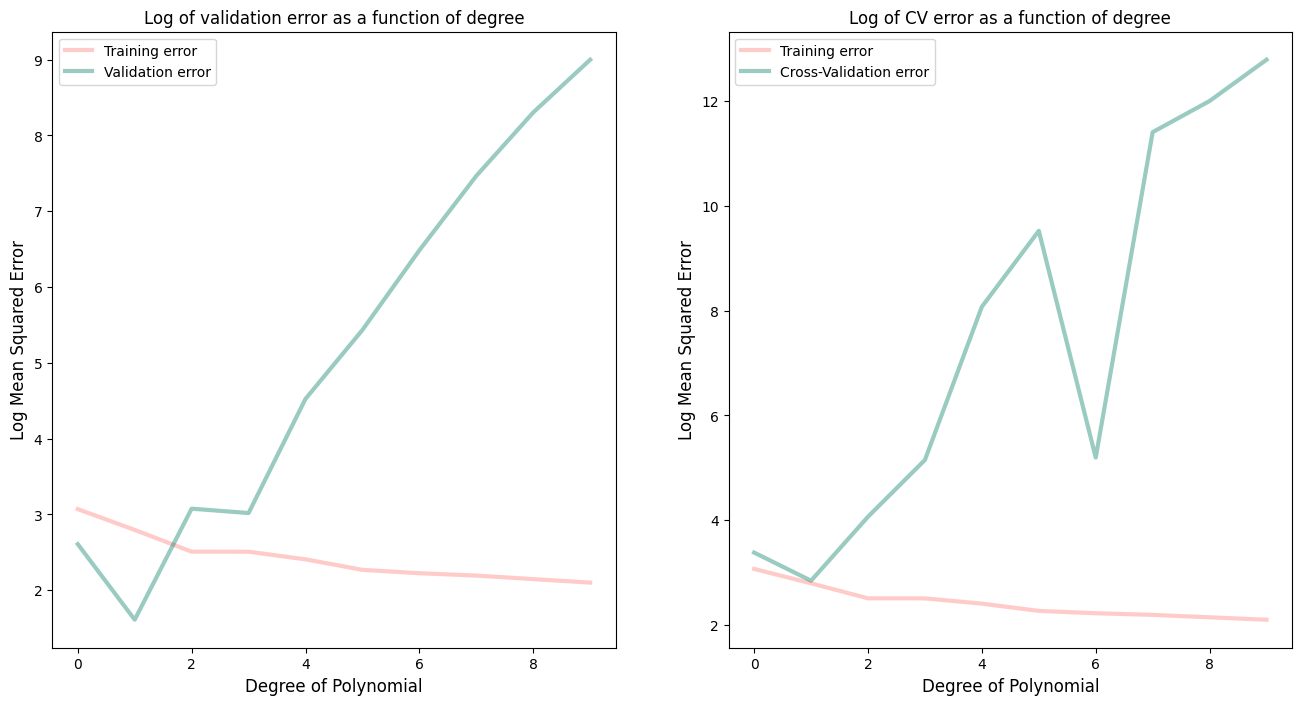

In [ ]:
# Plot the errors as a function of increasing d value to visualise the training and validation errors
fig, ax = plt.subplots(1,2, figsize=(16,8))

# Plot the training error with labels
ax[0].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax[0].plot(range(maxdeg), np.log(validation_error), label = 'Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Plot the training error with labels
ax[1].plot(range(maxdeg), np.log(training_error), label = 'Training error', linewidth=3, color='#FF7E79', alpha=0.4)

# Plot the cross-validation error with labels
ax[1].plot(range(maxdeg), np.log(cross_validation_error), label = 'Cross-Validation error', linewidth=3, color="#007D66", alpha=0.4)

# Set the plot labels and legends
ax[0].set_xlabel('Degree of Polynomial', fontsize=12)
ax[0].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[0].set_title("Log of validation error as a function of degree")

ax[1].set_xlabel('Degree of Polynomial', fontsize=12)
ax[1].set_ylabel('Log Mean Squared Error', fontsize=12)
ax[1].set_title("Log of CV error as a function of degree")

ax[0].legend()
ax[1].legend()
plt.show();